In [1]:
import pandas as pd
df = pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [2]:
df.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [3]:
import re

def generate_ngrams(s, n):
    # Convert to lowercases
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split("_") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [4]:
aa="112_274_158_215_274_158"
generate_ngrams(aa,5)
from sklearn.utils import resample


In [5]:
df_majority = df[df.malware==1]
df_minority = df[df.malware==0]
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_minority, df_majority_downsampled])


In [6]:
Xs=[]
Ys=[]
mals=0
nonmals=0
for index, row in df_upsampled.iterrows():
    strx=""
    for x in row[1:101]:
        strx+=str(x)+" "
    Ys.append(row['malware'])
    Xs.append(strx)
    if row['malware']==0:
        nonmals+=1
    else:
        mals+=1
print(mals)
print(nonmals)

2000
1079


In [7]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# If you want to take into account just term frequencies:
#vectorizer = CountVectorizer(ngram_range=(4,8))
# The ngram range specifies your ngram configuration.

#X = vectorizer.fit_transform(Xs)
# Testing the ngram generation:
#print(vectorizer.get_feature_names())
# This will print: ['by car', 'by jack', 'car was', 'cleaned by', 'jack was', 'was cleaned']

# This will print:[[0 1 1 1 0 1], [1 0 0 1 1 1]]

## And now testing TFIDF vectorizer:
vectorizer = TfidfVectorizer(ngram_range=(4,4)) # You can still specify n-grams here.
X_fit = vectorizer.fit_transform(Xs)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  Xs, Ys, test_size=0.20, random_state=42)

In [138]:
from sklearn.pipeline import Pipeline
from sklearn import svm
classifier = svm.LinearSVC(C=1.0, class_weight="balanced")

tf_idf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1))),
     ("classifier", classifier)
 ])

tf_idf.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LinearSVC(class_weight='balanced'))])

In [139]:
tf_idf.score(X_test,y_test)

0.8831168831168831

In [140]:
coefs = tf_idf.named_steps["classifier"].coef_

feature_names = tf_idf.named_steps["tfidf"].get_feature_names()
coefs_and_features = list(zip(coefs[0], feature_names))
#print("Most positive ")
# Most positive features
#aa=sorted(coefs_and_features, key=lambda x: x[0], reverse=True)
# Most negative features
#print("Most Negative")
#sorted(coefs_and_features, key=lambda x: x[0])[0:26]
# Most predictive overall
print("Most predictive")
aa=sorted(coefs_and_features, key=lambda x: abs(x[0]), reverse=True)

Most predictive


In [141]:
sequences=[]
for x in aa:
    sequences.append(x[1])

In [142]:
#sequences
from collections import defaultdict 
d = defaultdict(int) 

In [184]:
count=-1

for item in Xs:
    count+=1
    occur=0
    for seq in dicts_popular:
        ax=item.count(seq)
        if ax>0:
            d[seq]+=1
            occur+=ax
    print("Sample ",count,"which is a ",Ys[count]," has ",occur," occurences")
        

Sample  0 which is a  0  has  189  occurences
Sample  1 which is a  0  has  166  occurences
Sample  2 which is a  0  has  76  occurences
Sample  3 which is a  0  has  197  occurences
Sample  4 which is a  0  has  184  occurences
Sample  5 which is a  0  has  157  occurences
Sample  6 which is a  0  has  189  occurences
Sample  7 which is a  0  has  154  occurences
Sample  8 which is a  0  has  172  occurences
Sample  9 which is a  0  has  137  occurences
Sample  10 which is a  0  has  189  occurences
Sample  11 which is a  0  has  184  occurences
Sample  12 which is a  0  has  221  occurences
Sample  13 which is a  0  has  121  occurences
Sample  14 which is a  0  has  172  occurences
Sample  15 which is a  0  has  185  occurences
Sample  16 which is a  0  has  186  occurences
Sample  17 which is a  0  has  175  occurences
Sample  18 which is a  0  has  147  occurences
Sample  19 which is a  0  has  184  occurences
Sample  20 which is a  0  has  189  occurences
Sample  21 which is a  0

Sample  217 which is a  0  has  121  occurences
Sample  218 which is a  0  has  176  occurences
Sample  219 which is a  0  has  181  occurences
Sample  220 which is a  0  has  229  occurences
Sample  221 which is a  0  has  171  occurences
Sample  222 which is a  0  has  184  occurences
Sample  223 which is a  0  has  189  occurences
Sample  224 which is a  0  has  195  occurences
Sample  225 which is a  0  has  189  occurences
Sample  226 which is a  0  has  243  occurences
Sample  227 which is a  0  has  176  occurences
Sample  228 which is a  0  has  134  occurences
Sample  229 which is a  0  has  189  occurences
Sample  230 which is a  0  has  256  occurences
Sample  231 which is a  0  has  184  occurences
Sample  232 which is a  0  has  132  occurences
Sample  233 which is a  0  has  189  occurences
Sample  234 which is a  0  has  114  occurences
Sample  235 which is a  0  has  184  occurences
Sample  236 which is a  0  has  160  occurences
Sample  237 which is a  0  has  189  occ

Sample  574 which is a  0  has  184  occurences
Sample  575 which is a  0  has  189  occurences
Sample  576 which is a  0  has  189  occurences
Sample  577 which is a  0  has  167  occurences
Sample  578 which is a  0  has  165  occurences
Sample  579 which is a  0  has  179  occurences
Sample  580 which is a  0  has  269  occurences
Sample  581 which is a  0  has  171  occurences
Sample  582 which is a  0  has  186  occurences
Sample  583 which is a  0  has  124  occurences
Sample  584 which is a  0  has  178  occurences
Sample  585 which is a  0  has  184  occurences
Sample  586 which is a  0  has  184  occurences
Sample  587 which is a  0  has  165  occurences
Sample  588 which is a  0  has  145  occurences
Sample  589 which is a  0  has  189  occurences
Sample  590 which is a  0  has  161  occurences
Sample  591 which is a  0  has  192  occurences
Sample  592 which is a  0  has  131  occurences
Sample  593 which is a  0  has  168  occurences
Sample  594 which is a  0  has  189  occ

Sample  789 which is a  0  has  94  occurences
Sample  790 which is a  0  has  184  occurences
Sample  791 which is a  0  has  229  occurences
Sample  792 which is a  0  has  186  occurences
Sample  793 which is a  0  has  168  occurences
Sample  794 which is a  0  has  200  occurences
Sample  795 which is a  0  has  105  occurences
Sample  796 which is a  0  has  24  occurences
Sample  797 which is a  0  has  248  occurences
Sample  798 which is a  0  has  159  occurences
Sample  799 which is a  0  has  184  occurences
Sample  800 which is a  0  has  151  occurences
Sample  801 which is a  0  has  184  occurences
Sample  802 which is a  0  has  179  occurences
Sample  803 which is a  0  has  169  occurences
Sample  804 which is a  0  has  168  occurences
Sample  805 which is a  0  has  164  occurences
Sample  806 which is a  0  has  184  occurences
Sample  807 which is a  0  has  188  occurences
Sample  808 which is a  0  has  127  occurences
Sample  809 which is a  0  has  181  occur

Sample  1003 which is a  0  has  161  occurences
Sample  1004 which is a  0  has  189  occurences
Sample  1005 which is a  0  has  192  occurences
Sample  1006 which is a  0  has  189  occurences
Sample  1007 which is a  0  has  186  occurences
Sample  1008 which is a  0  has  152  occurences
Sample  1009 which is a  0  has  189  occurences
Sample  1010 which is a  0  has  172  occurences
Sample  1011 which is a  0  has  106  occurences
Sample  1012 which is a  0  has  189  occurences
Sample  1013 which is a  0  has  188  occurences
Sample  1014 which is a  0  has  189  occurences
Sample  1015 which is a  0  has  77  occurences
Sample  1016 which is a  0  has  165  occurences
Sample  1017 which is a  0  has  159  occurences
Sample  1018 which is a  0  has  189  occurences
Sample  1019 which is a  0  has  167  occurences
Sample  1020 which is a  0  has  153  occurences
Sample  1021 which is a  0  has  189  occurences
Sample  1022 which is a  0  has  184  occurences
Sample  1023 which is

Sample  1217 which is a  1  has  193  occurences
Sample  1218 which is a  1  has  192  occurences
Sample  1219 which is a  1  has  176  occurences
Sample  1220 which is a  1  has  192  occurences
Sample  1221 which is a  1  has  124  occurences
Sample  1222 which is a  1  has  171  occurences
Sample  1223 which is a  1  has  211  occurences
Sample  1224 which is a  1  has  164  occurences
Sample  1225 which is a  1  has  139  occurences
Sample  1226 which is a  1  has  132  occurences
Sample  1227 which is a  1  has  210  occurences
Sample  1228 which is a  1  has  127  occurences
Sample  1229 which is a  1  has  106  occurences
Sample  1230 which is a  1  has  187  occurences
Sample  1231 which is a  1  has  159  occurences
Sample  1232 which is a  1  has  176  occurences
Sample  1233 which is a  1  has  193  occurences
Sample  1234 which is a  1  has  183  occurences
Sample  1235 which is a  1  has  198  occurences
Sample  1236 which is a  1  has  174  occurences
Sample  1237 which i

Sample  1431 which is a  1  has  124  occurences
Sample  1432 which is a  1  has  200  occurences
Sample  1433 which is a  1  has  124  occurences
Sample  1434 which is a  1  has  165  occurences
Sample  1435 which is a  1  has  193  occurences
Sample  1436 which is a  1  has  176  occurences
Sample  1437 which is a  1  has  174  occurences
Sample  1438 which is a  1  has  124  occurences
Sample  1439 which is a  1  has  176  occurences
Sample  1440 which is a  1  has  200  occurences
Sample  1441 which is a  1  has  193  occurences
Sample  1442 which is a  1  has  178  occurences
Sample  1443 which is a  1  has  238  occurences
Sample  1444 which is a  1  has  138  occurences
Sample  1445 which is a  1  has  156  occurences
Sample  1446 which is a  1  has  137  occurences
Sample  1447 which is a  1  has  206  occurences
Sample  1448 which is a  1  has  144  occurences
Sample  1449 which is a  1  has  138  occurences
Sample  1450 which is a  1  has  75  occurences
Sample  1451 which is

Sample  1645 which is a  1  has  147  occurences
Sample  1646 which is a  1  has  143  occurences
Sample  1647 which is a  1  has  120  occurences
Sample  1648 which is a  1  has  254  occurences
Sample  1649 which is a  1  has  139  occurences
Sample  1650 which is a  1  has  180  occurences
Sample  1651 which is a  1  has  140  occurences
Sample  1652 which is a  1  has  124  occurences
Sample  1653 which is a  1  has  182  occurences
Sample  1654 which is a  1  has  175  occurences
Sample  1655 which is a  1  has  175  occurences
Sample  1656 which is a  1  has  237  occurences
Sample  1657 which is a  1  has  190  occurences
Sample  1658 which is a  1  has  172  occurences
Sample  1659 which is a  1  has  156  occurences
Sample  1660 which is a  1  has  172  occurences
Sample  1661 which is a  1  has  178  occurences
Sample  1662 which is a  1  has  124  occurences
Sample  1663 which is a  1  has  205  occurences
Sample  1664 which is a  1  has  178  occurences
Sample  1665 which i

Sample  1860 which is a  1  has  187  occurences
Sample  1861 which is a  1  has  195  occurences
Sample  1862 which is a  1  has  173  occurences
Sample  1863 which is a  1  has  161  occurences
Sample  1864 which is a  1  has  150  occurences
Sample  1865 which is a  1  has  195  occurences
Sample  1866 which is a  1  has  135  occurences
Sample  1867 which is a  1  has  154  occurences
Sample  1868 which is a  1  has  126  occurences
Sample  1869 which is a  1  has  202  occurences
Sample  1870 which is a  1  has  200  occurences
Sample  1871 which is a  1  has  186  occurences
Sample  1872 which is a  1  has  178  occurences
Sample  1873 which is a  1  has  186  occurences
Sample  1874 which is a  1  has  127  occurences
Sample  1875 which is a  1  has  173  occurences
Sample  1876 which is a  1  has  159  occurences
Sample  1877 which is a  1  has  172  occurences
Sample  1878 which is a  1  has  178  occurences
Sample  1879 which is a  1  has  181  occurences
Sample  1880 which i

Sample  2074 which is a  1  has  118  occurences
Sample  2075 which is a  1  has  120  occurences
Sample  2076 which is a  1  has  205  occurences
Sample  2077 which is a  1  has  180  occurences
Sample  2078 which is a  1  has  173  occurences
Sample  2079 which is a  1  has  253  occurences
Sample  2080 which is a  1  has  240  occurences
Sample  2081 which is a  1  has  234  occurences
Sample  2082 which is a  1  has  193  occurences
Sample  2083 which is a  1  has  178  occurences
Sample  2084 which is a  1  has  182  occurences
Sample  2085 which is a  1  has  175  occurences
Sample  2086 which is a  1  has  176  occurences
Sample  2087 which is a  1  has  153  occurences
Sample  2088 which is a  1  has  182  occurences
Sample  2089 which is a  1  has  181  occurences
Sample  2090 which is a  1  has  178  occurences
Sample  2091 which is a  1  has  170  occurences
Sample  2092 which is a  1  has  238  occurences
Sample  2093 which is a  1  has  186  occurences
Sample  2094 which i

Sample  2288 which is a  1  has  160  occurences
Sample  2289 which is a  1  has  172  occurences
Sample  2290 which is a  1  has  297  occurences
Sample  2291 which is a  1  has  161  occurences
Sample  2292 which is a  1  has  124  occurences
Sample  2293 which is a  1  has  124  occurences
Sample  2294 which is a  1  has  195  occurences
Sample  2295 which is a  1  has  172  occurences
Sample  2296 which is a  1  has  186  occurences
Sample  2297 which is a  1  has  146  occurences
Sample  2298 which is a  1  has  124  occurences
Sample  2299 which is a  1  has  151  occurences
Sample  2300 which is a  1  has  185  occurences
Sample  2301 which is a  1  has  181  occurences
Sample  2302 which is a  1  has  234  occurences
Sample  2303 which is a  1  has  178  occurences
Sample  2304 which is a  1  has  187  occurences
Sample  2305 which is a  1  has  202  occurences
Sample  2306 which is a  1  has  172  occurences
Sample  2307 which is a  1  has  149  occurences
Sample  2308 which i

Sample  2502 which is a  1  has  176  occurences
Sample  2503 which is a  1  has  174  occurences
Sample  2504 which is a  1  has  210  occurences
Sample  2505 which is a  1  has  124  occurences
Sample  2506 which is a  1  has  153  occurences
Sample  2507 which is a  1  has  172  occurences
Sample  2508 which is a  1  has  172  occurences
Sample  2509 which is a  1  has  73  occurences
Sample  2510 which is a  1  has  124  occurences
Sample  2511 which is a  1  has  148  occurences
Sample  2512 which is a  1  has  172  occurences
Sample  2513 which is a  1  has  108  occurences
Sample  2514 which is a  1  has  181  occurences
Sample  2515 which is a  1  has  195  occurences
Sample  2516 which is a  1  has  180  occurences
Sample  2517 which is a  1  has  209  occurences
Sample  2518 which is a  1  has  176  occurences
Sample  2519 which is a  1  has  189  occurences
Sample  2520 which is a  1  has  181  occurences
Sample  2521 which is a  1  has  124  occurences
Sample  2522 which is

Sample  2717 which is a  1  has  210  occurences
Sample  2718 which is a  1  has  172  occurences
Sample  2719 which is a  1  has  163  occurences
Sample  2720 which is a  1  has  149  occurences
Sample  2721 which is a  1  has  149  occurences
Sample  2722 which is a  1  has  178  occurences
Sample  2723 which is a  1  has  234  occurences
Sample  2724 which is a  1  has  172  occurences
Sample  2725 which is a  1  has  174  occurences
Sample  2726 which is a  1  has  234  occurences
Sample  2727 which is a  1  has  185  occurences
Sample  2728 which is a  1  has  124  occurences
Sample  2729 which is a  1  has  205  occurences
Sample  2730 which is a  1  has  170  occurences
Sample  2731 which is a  1  has  253  occurences
Sample  2732 which is a  1  has  173  occurences
Sample  2733 which is a  1  has  180  occurences
Sample  2734 which is a  1  has  184  occurences
Sample  2735 which is a  1  has  156  occurences
Sample  2736 which is a  1  has  204  occurences
Sample  2737 which i

Sample  2950 which is a  1  has  174  occurences
Sample  2951 which is a  1  has  124  occurences
Sample  2952 which is a  1  has  186  occurences
Sample  2953 which is a  1  has  180  occurences
Sample  2954 which is a  1  has  202  occurences
Sample  2955 which is a  1  has  172  occurences
Sample  2956 which is a  1  has  124  occurences
Sample  2957 which is a  1  has  195  occurences
Sample  2958 which is a  1  has  178  occurences
Sample  2959 which is a  1  has  128  occurences
Sample  2960 which is a  1  has  174  occurences
Sample  2961 which is a  1  has  181  occurences
Sample  2962 which is a  1  has  154  occurences
Sample  2963 which is a  1  has  124  occurences
Sample  2964 which is a  1  has  180  occurences
Sample  2965 which is a  1  has  58  occurences
Sample  2966 which is a  1  has  180  occurences
Sample  2967 which is a  1  has  153  occurences
Sample  2968 which is a  1  has  234  occurences
Sample  2969 which is a  1  has  176  occurences
Sample  2970 which is

In [182]:
d_sorted={k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
dicts_popular=[]
cc=0
for key in d_sorted:
    dicts_popular.append(key)
    if cc==25:
        break
    cc+=1

In [185]:
print(len(dicts_popular))

26


In [153]:
print(d_sorted)

{'11': 9189, '17': 9186, '117': 9153, '15': 9084, '24': 9063, '40': 9054, '215': 9045, '240': 9024, '72': 8961, '20': 8937, '172': 8916, '60': 8124, '74': 7857, '14': 7854, '274': 7851, '58': 7701, '158': 7695, '29': 7638, '28': 7194, '208': 7122, '35': 7059, '65': 7002, '260': 6999, '141': 6516, '97': 5901, '297': 5880, '19': 3888, '71': 3712, '22': 3608, '25': 3522, '86': 3472, '10': 3288, '82': 3256, '13': 3252, '98': 3194, '171': 3132, '87': 3112, '81': 2880, '112': 2870, '16': 2864, '135': 2830, '286': 2536, '75': 2536, '275': 2534, '198': 2514, '56': 2352, '18': 2320, '187': 2278, '99': 2236, '110': 2142, '228': 1988, '31': 1788, '94': 1726, '202': 1630, '57': 1500, '140': 1470, '80': 1448, '257': 1414, '225': 1396, '261': 1332, '64': 1272, '106': 1264, '264': 1264, '30': 1156, '199': 1148, '123': 1078, '194': 1058, '114': 1040, '89': 994, '209': 946, '76': 942, '62': 940, '93': 934, '262': 922, '298': 916, '70': 900, '287': 868, '59': 862, '159': 854, '144': 766, '270': 750, '30

In [186]:
encoded_dicts={}
for idx in range(0,len(dicts_popular)):
    encoded_dicts[dicts_popular[idx]]=chr(65+idx)

In [187]:
encoded_dicts

{'11': 'A',
 '17': 'B',
 '117': 'C',
 '15': 'D',
 '24': 'E',
 '40': 'F',
 '215': 'G',
 '240': 'H',
 '72': 'I',
 '20': 'J',
 '172': 'K',
 '60': 'L',
 '74': 'M',
 '14': 'N',
 '274': 'O',
 '58': 'P',
 '158': 'Q',
 '29': 'R',
 '28': 'S',
 '208': 'T',
 '35': 'U',
 '65': 'V',
 '260': 'W',
 '141': 'X',
 '97': 'Y',
 '297': 'Z'}

In [195]:
cleaned_X=[]
count=-1
rf=open("benign_sequences_dna.txt","w+")
cc=0
for seq in Xs:
    aa=[]
    arr=seq.split(" ")
    present=0
    for item in arr:
        if item in encoded_dicts:
            aa.append(encoded_dicts[item])
            present+=1
    ax=''.join(aa)
    print(ax)
    cleaned_X.append(ax)
    if Ys[cc]==0:
        rf.write(ax)
        rf.write("\n")
    cc+=1
rf.close()


KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGCZC
TGCKHCKCKCKCGWXWXVWXVWXVHCVKCGTGWOQGOQGKCGGKKCGGWKCGGKCGGZ
RRRZZZGKCKCRRRZRRRTRZGTT
HCHCHCHCHCHCTHKCHCHCLCOQGOQGUTUHCHCHCWCGGGGTTOQGTLHCHCZGHCHCHGCUHCTCUHCUTH
KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGCW
GKTJZCHVOQGOQGOQGWIOQGCOGGGQGCDHCCJKCGTTDCTZJGZJGHCCKHCKHCKHC
KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGCZC
GOQGOQGWXVWXVHCWXWXVXVKCLLTTOQTGUTUHCLHCHCZGUGOUVWXVULKCUUGHCCGWXVGUGGTWXV
TGCHCKCKCKCGWXWXVWXVWXVHCVKCGTGWZGKCGKCTKCKCUCKJKGKCKCKCKCKCK
HCHCHCHCHCHCHCHCHCHCHCHCTTTKCKCTGGGGGGGGGZTTTTGTTTHC
KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGCZC
KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGCW
GOQGOQGOQGKHCTTTKHCZKHCZHTOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQGOQ
GOQGOQGOQTQVTHZGWXVWXVKCWWHCXVWXVGWXVVHVHWXVWXVKCW
HVOQGOQGOQGWIOQGTWXVWXVKLTTHCUKCT

KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWWHCXVWXVGHC
HCHCHCHCKCKCHCAOQGOQGCCCZGWXVWXWXVVWXVNVWHXVWXVWXVKCWTHCWFWFWXWXWXXWXWXW
HCHCHCHCKCKCHCAOQGOQGCCCZGWXVWXWXVVWXVHNVWXVWXVWXVKCWTHCWFWFW
OQGOQGTKCKCKCULLLLLLLLLLLLLLCLLTUGUTHCKLLULUKLLLKCKCKCUTHCZGUT
GOQGOQGKCKCKCTWHCKCWOQKCHCKCRWXVKCKCHHULLLLLLLLLLLLLLGTUTHCHCHCHCHCDCDHCHCHC
HCHCKCKCTHCHCHCKCHCHCHCHCHCVHCHCHCHCHCKCTTGGUTHCTHCUACUCHCSCUHCGTWHCCTC
HCHCHCHCHCTTHCUKCTUGOQGOQGUTHCTHCHCHCKCHCWXVWXVKCWHCTTHCHCHCVHCHCHCHCHCKCGTHC
TTKCKTTHCHCVVWXVGHCHCHCHCHCHCHCHCHCWXVZHCACTCSCACCCGTGOQGOQGHCZGTGTKCOGWXVHC
KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGW
HCHCHCHCHCHCHCHCHCHCHCHCGOQGOQGKCKCKCTWHCKCWOQKCHCKCRWXVKCKCHHULLLLLLLLLLLLL
GOQGOQGKCKCKCTWHCKCWOQKCKCWXVKCHCHULLLLLLLLLLLLLLGTUTHCHCHCTHCHCDCDHCHCHCKLL
HCHCHCHCHCHCHCHCHCHCHCGOQGOQGKCKCKCTWHCKCWOQKCHCKCWXVKCKCHHULLGTUTHCHCHCHCHCDCDHCHCHCKLU
HCHCHCHCHCKCTHCKHKOQGKCGQGHCHCKCHCQGQGKCHCHCHCHCQGHCHCHCHCHCKCTGTGUTHC
GOQGOQGKCKCKCTWHCKCWOQK

HCHCHCHCHCTHCHCHCKCHCHCTTHCHCHCVHCHCHCHCHCKCGGUTHCHCACSCHCUTTUWXTHCVW
TTKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCKCTCTCTHCHCHCHC
HCHCHCHCHCHCHCHCHCHCHCHCHCHCKCWXVHCHCGGGGGGGGOQGOQGHCZGTVVVVVVVV
GOQGOQGKCKCKCTWHCKCWOQKCHCKCRWXVKCKCHHULLLGTUTHCHCHCHCHCDCDHCHCHCKLLULUKLLLKCKC
OQGOQGTKCKCKCULLLLLLLLLLLLLLCLLTUGUTHCKLLULUKLLLKCKCKCUTHCZGUT
OQGOQGTKCKCKCULLLLLLLLLLLLLLCLLTUGUTHCKLLULUKLLLKCKCKCTKCKCTTHTT
HCHCHCHCKCKCHCAOQGOQGCCCZGWXVWXWXVVWXVNVWXHXVWXVWXVKCWTHCWFWFWXWXWXWXWXWXWXWXW
OHCWCFCWFCCVWCXCXVWFVWXVWFVWFVWXVWXVKCWXVKHKOQGKCGQGHCHCZGGZGGWVWXVGWXV
KCLTLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL
GOQGOQGKCKCKCTWHCKCWOQKCHCKCWXVKCKCHHULLLGTUTHCHCHCHCHCDCDHCHCHCKLLULUKLLLKCKCK
OHCWCFCWFCCVWCXCXVWFVWXVWFVWFVWXVWXVKCWXVKHKOQGKCOQOQGOOQGGOGOGOGOGOGOQGOGOQGQG
KCTTTHHWHCXVWXOQGOQGVGHHHCKCHHHKCZGHTHHHHCWGKCKCKCHZGZGZ
HCHCHCHCHCKCKCTHCOKHKOQGKCGQGHCHCKCHCQGQGKCHCTTHCHCHCQGHCHCHCHCHCKCTT
HCHCHCHCHCKCHGOQGOQGHCZGHHHOQOQGOHOKHKOQGKCGQGTTHHHQGQGKCHCHCLLCL
TTKCKTKCKCKCKCKCTGGGGGGTKCKCKCKCK

In [193]:
cleaned_X[0]

'KHCHCHCWXVWXVWXVWXVWXVWGOQGOQGHCZGCHCHCWXVWCWXVCWXVCCWVXVWVXVCGWVXVWHCWXVVCWZGGCZC'

In [ ]:
#Pipeline : 

In [196]:
##LEt's analyze Malware 


In [209]:
import pickle
mals_results=[]
benign_results=[]
with open('mal_results','rb') as f:
    mals_results.extend(pickle.load(f))
with open('benign_results','rb') as f:
    benign_results.extend(pickle.load(f))

In [210]:
mals=[]
benigns=[]
for item in mals_results:
    mals.append(item[0][1])
for item in benign_results:
    benigns.append(item[0][1])

In [226]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-235-4d4249c6058f>:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts1, bin_edges1 = np.histogram(data, bins=num_bins, normed=True)
<ipython-input-235-4d4249c6058f>:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts2,bin_edges2=np.histogram(benigns,bins=num_bins,normed=True)


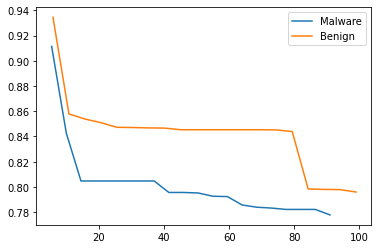

In [235]:
# Choose how many bins you want here
data=mals
num_bins = 20

# Use the histogram function to bin the data
counts1, bin_edges1 = np.histogram(data, bins=num_bins, normed=True)

# Now find the cdf
cdfmal = np.cumsum(counts1)

counts2,bin_edges2=np.histogram(benigns,bins=num_bins,normed=True)
cdfbenign=np.cumsum(counts2)
# And finally plot the cdf
plt.plot(bin_edges1[1:], 1-cdfmal,label="Malware")
plt.plot(bin_edges2[1:], 1-cdfbenign,label="Benign")
plt.legend()
plt.show()


In [229]:
X

array([0.00000000e+00, 5.56574924e-02, 1.11314985e-01, ...,
       9.08330275e+01, 9.08886850e+01, 9.09443425e+01])